<h1> Visualize Signal and BG PDF for profile likelihood </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from LZlim_pyNEST import *
from ROOT import TH2D
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h1> WS cuts </h1>

In [2]:
#WS cuts
S1_min=0
S1_max=50
S2raw_min=250
NS1_coin_req=3

<h1> Get NR, ER bands </h1>

In [3]:
##############################################################################
#Generate Flat ER and NR spectra:
##############################################################################
#LZ
S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, stdev_S2oS1_e, E_bin_cen_e, Eff_e, E_bin_cen_r, Eff_r = genBands()

#get NR mean, with a smooth spline
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.01)


//global/project/projectdirs/lux/data/aLib/pyNEST.py:384: RuntimeWarning: invalid value encountered in true_divide
  R[TIB>0]       = 1. - np.log(1. + (Ni[TIB>0]/4.) * TIB[TIB>0]) / ((Ni[TIB>0]/4.)*TIB[TIB>0])
//global/project/projectdirs/lux/data/aLib/pyNEST.py:385: RuntimeWarning: invalid value encountered in greater
  R[R>1.]        = 1.
//global/project/projectdirs/lux/data/aLib/pyNEST.py:386: RuntimeWarning: invalid value encountered in less
  R[R<0.]        = 0.
//global/project/projectdirs/lux/data/aLib/pyNEST.py:111: RuntimeWarning: invalid value encountered in less
  poisMeanIn[poisMeanIn<1e-6] = 1e-6
/global/project/projectdirs/lux/Tools/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/global/project/projectdirs/lux/Tools/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(re

<h1> ATM nu PDF </h1>

total between 1.00 and 100.00 keV = 1.09144e-07 [evts/kg/day]
LZ exposure factor = 32722.1


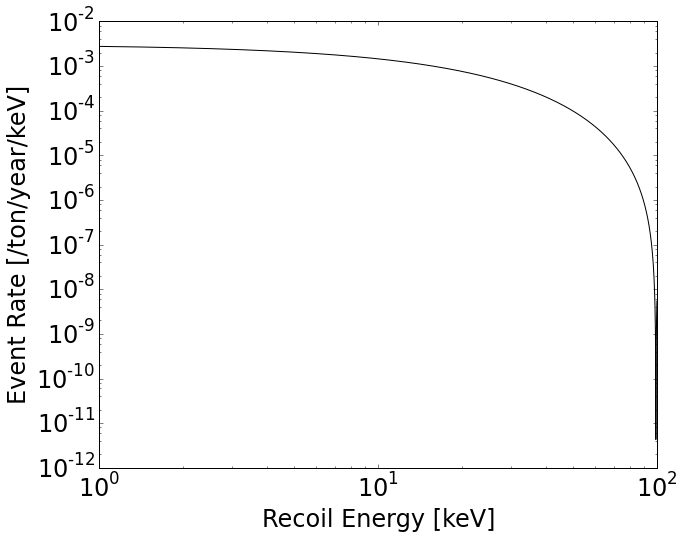

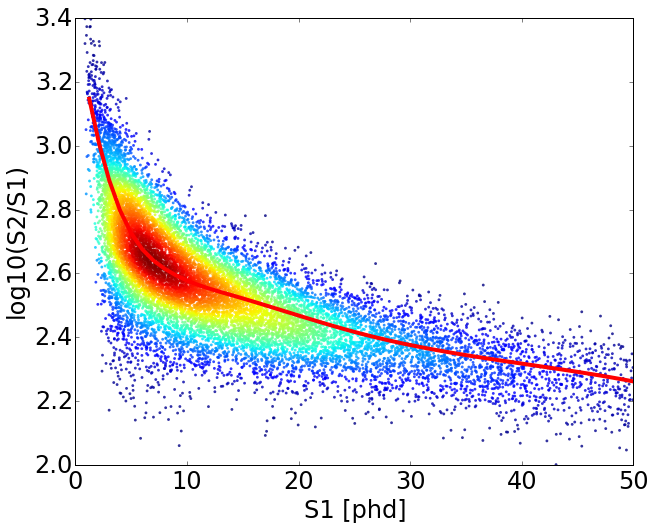

In [4]:
# ATM nu PDF
file_path='data/atm_Peter_update.txt' #caught a 2x error in rate
title='ATM'
ParticleType='NR'
nSim=2e4

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)
S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plt.xlim([0,50])
plt.ylim([2,3.4])

savefig('figs/'+title+'_S2S1.png')

<h1> B8 </h1>

total between 1.00 and 4.40 keV = 0.000260662 [evts/kg/day]
LZ exposure factor = 2740.27


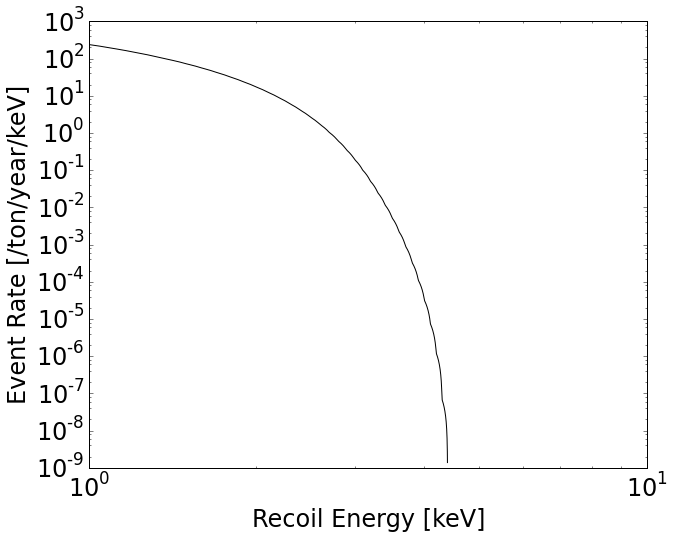

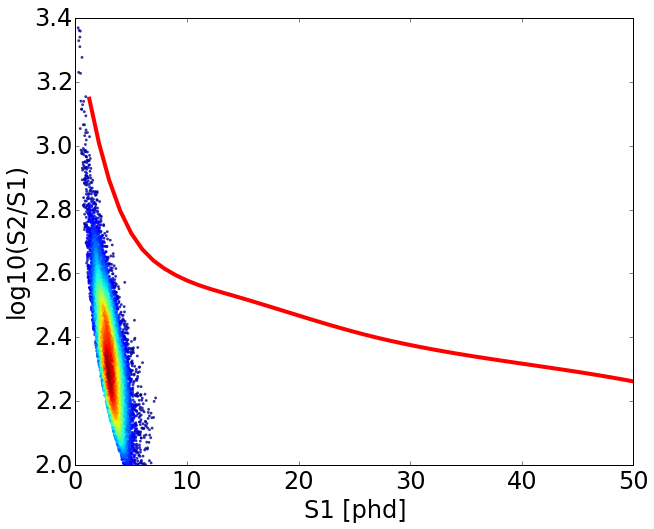

In [6]:
# 8B nu PDF
file_path='data/B8_Peter.txt'
title='B8'
ParticleType='NR'
nSim=4e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)
S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 24})
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plt.xlim([0,50])
plt.ylim([2,3.4])

savefig('figs/'+title+'_S2S1.png')

<h1> HEP </h1>

total between 0.10 and 5.80 keV = 6.32879e-06 [evts/kg/day]
LZ exposure factor = 56431.5


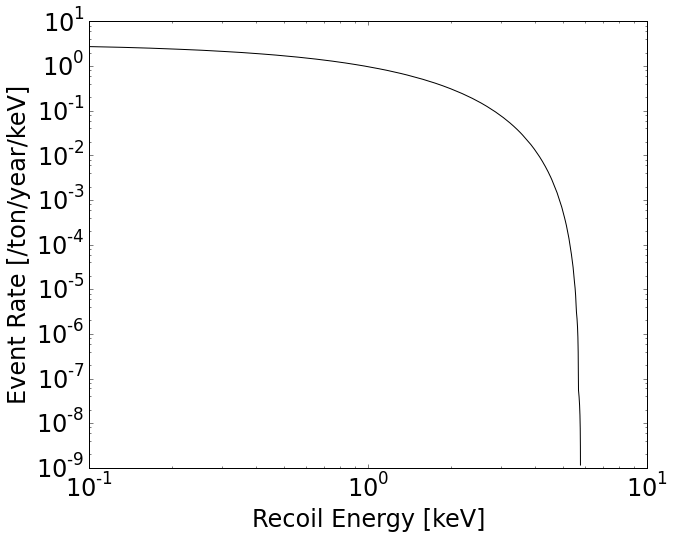

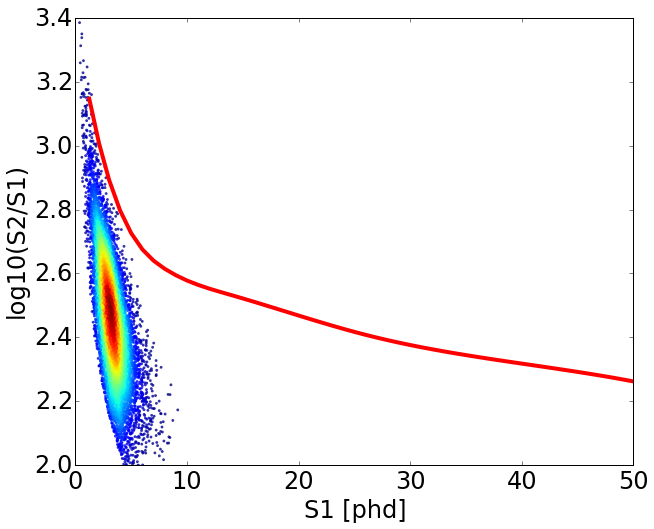

In [7]:
# 8B nu PDF
file_path='data/hep_Peter.txt' 
title='HEP'
ParticleType='NR'
nSim=2e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)
S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 24})
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plt.xlim([0,50])
plt.ylim([2,3.4])

savefig('figs/'+title+'_S2S1.png')

<h1> DSN </h1>

total between 0.10 and 118.35 keV = 1.21975e-07 [evts/kg/day]
LZ exposure factor = 146400


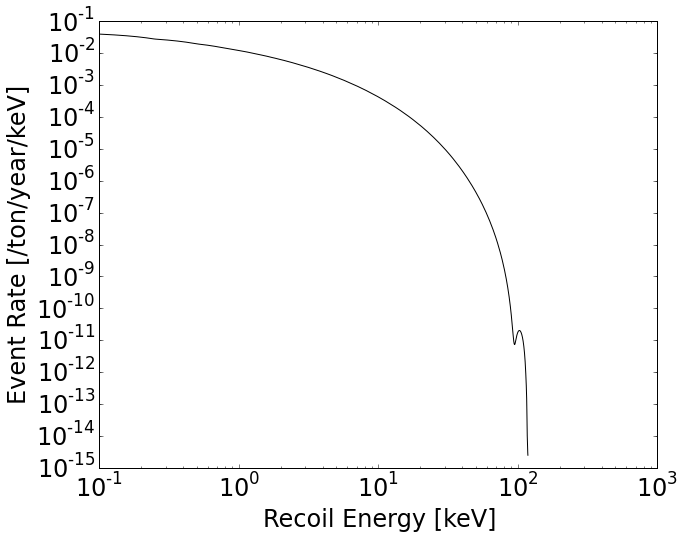

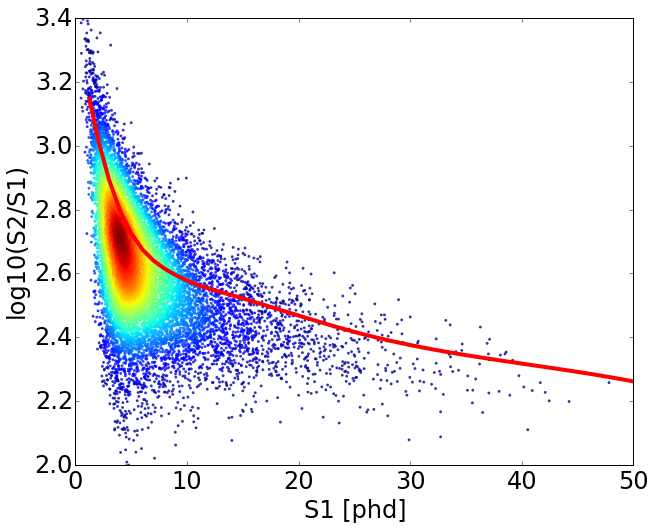

In [8]:
file_path='data/DSN_DiffRate.txt' 
title='DSN'
ParticleType='NR'
nSim=1e5

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)
S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 24})
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plt.xlim([0,50])
plt.ylim([2,3.4])

savefig('figs/'+title+'_S2S1.png')

<h1> PP + 7Be + 13N</h1>

In [ ]:
file_path='data/PPsolarNu_Peter.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hPP=TH2D("hPP","PP pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hPP.Fill(S1_cut[index],S2_cut[index])
hPP.Scale(Rate_evts_kg_day/nSim*250/271) #patch to match Peter's calculation
hPP.SaveAs("root_pdfs/PP_pdf.root") #write out to file

<h1>2nvBB 136Xe </h1>

In [ ]:
file_path='data/twovBB_evt_ton_year_keV_lin.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

h2vBB=TH2D("h2vBB","2vBB pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    h2vBB.Fill(S1_cut[index],S2_cut[index])
h2vBB.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
h2vBB.SaveAs("root_pdfs/2vBB_pdf.root") #write out to file

<h1> 85Kr </h1>

In [ ]:
file_path='data/Kr85_beta_spectrum_LZ_fid.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hKr=TH2D("hKr","Kr pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hKr.Fill(S1_cut[index],S2_cut[index])
hKr.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
hKr.SaveAs("root_pdfs/Kr_pdf.root") #write out to file

<h1> Rn222 </h1>

In [ ]:
#### Rn222 ... approximate 0.3 evt/keV/Ton/year at 0.1 uBq/kg, LZ has about 0.07 uBq/kg ########
Rn222_rate=0.7*0.35*100/365 #evt/Ton/year/keV...*100keV/365days to E_max with 0.7 uBq/kg
nSim=ceil(Rn222_rate*1000*5.6)#in 1000 days *5.6 Tons #doesn't scale with 5.6 tons, assume Bq to kg conversion
#Eee, kr85=np.loadtxt('Kr85_beta_spectrum_LZ_fid.txt',skiprows=0,unpack=True) #evts/keV/day with no discrim
Eee=np.linspace(0.1,100,2e3) # to 100 keV
Rn222 = 0.7*0.35*ones(size(Eee)) #evts/keV/ton/year... for 0.7 uBq/kg
#Energy scale must be linear in text file for code to work properly!
dR = Rn222 #evts/keV/ton/yea

np.savetxt('data/Rn222_LZ_fid.txt' ,np.vstack([Eee, dR]).T)

file_path='data/Rn222_LZ_fid.txt'
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hRn=TH2D("hRn","Rn pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hRn.Fill(S1_cut[index],S2_cut[index])
hRn.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
hRn.SaveAs("root_pdfs/Rn_pdf.root") #write out to file

<h1> Detector ER fiducial BG from Paolo </h1>

In [ ]:
file_path='data/rate_er_fidvol.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hDetE=TH2D("hDetE","Det ER pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hDetE.Fill(S1_cut[index],S2_cut[index])
hDetE.Scale(Rate_evts_kg_day/nSim) 
hDetE.SaveAs("root_pdfs/Detfid_ER_pdf.root") #write out to file

<h1> Detector NR fiducial from Paolo </h1>

In [ ]:
file_path='data/rate_nr_fidvol.txt' 
ParticleType='NR'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hDetN=TH2D("hDetN","Det NR pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hDetN.Fill(S1_cut[index],S2_cut[index])
hDetN.Scale(Rate_evts_kg_day/nSim) 
hDetN.SaveAs("root_pdfs/Detfid_NR_pdf.root") #write out to file

<h1> Generate WIMP signal PDFs </h1>

total rate above 0.00 keV = 804491 [evts/kg/day per pb]
LZ exposure factor per pb = 4.43937e-08
total rate above 0.00 keV = 1.40673e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 1.01552e-08
total rate above 0.00 keV = 1.82241e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 4.89931e-09
total rate above 0.00 keV = 1.82844e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 1.95326e-09


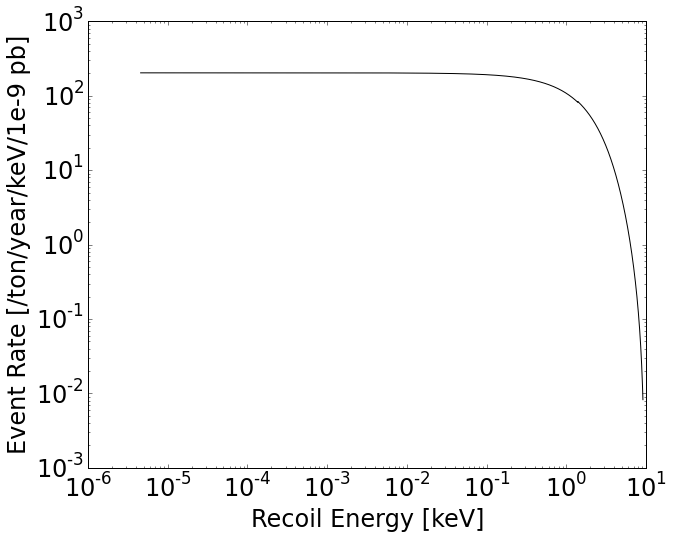

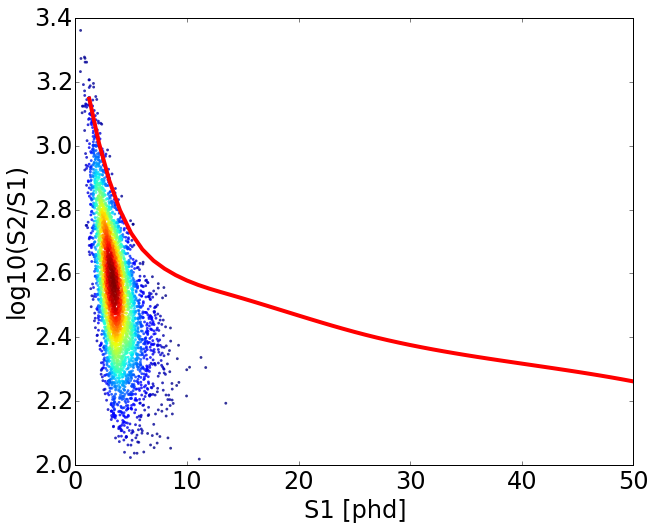

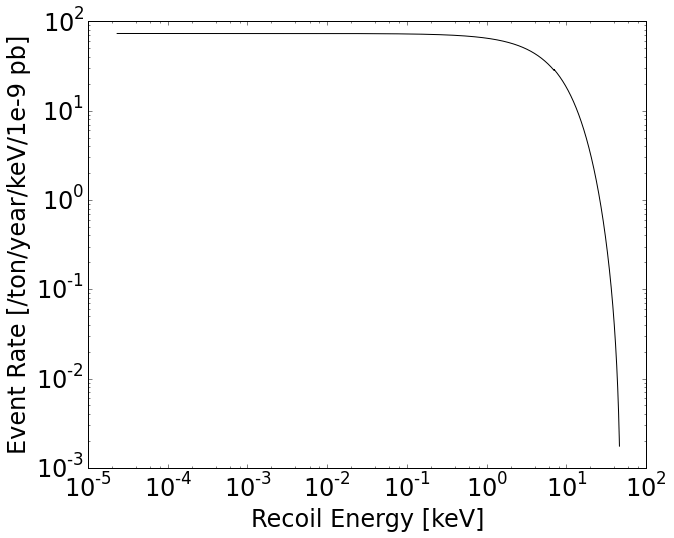

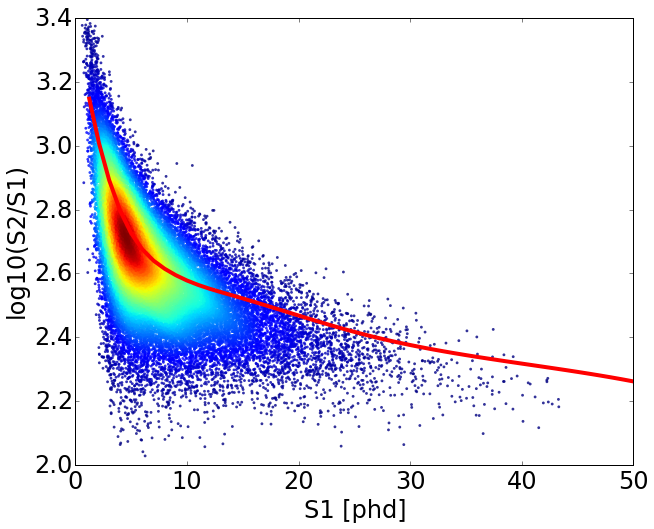

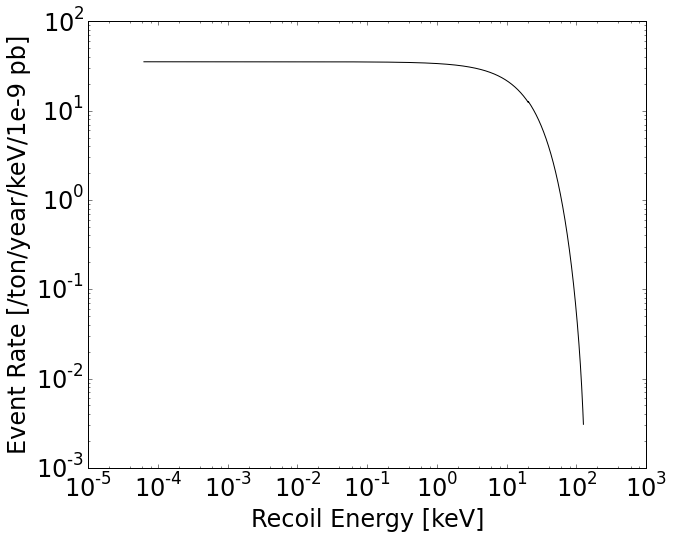

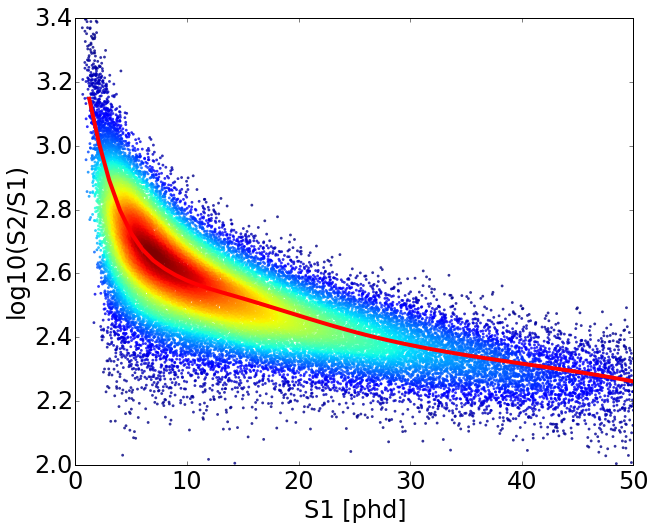

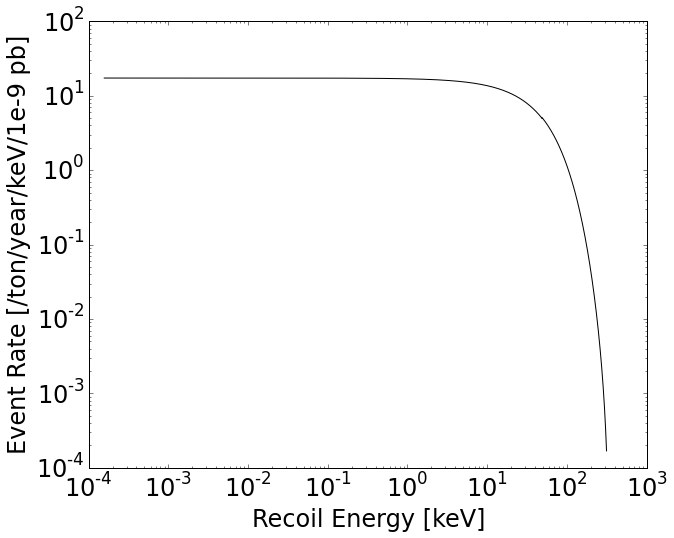

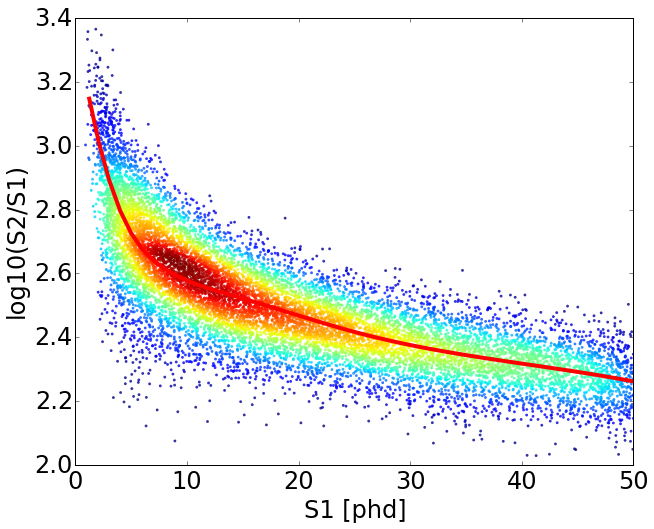

In [9]:
nSim=1e4

#Generate WIMPs
for mWmp,nSim in zip(int32([10,25,50,100]),int32([2e5,8e4,4e4,2e4])):
    Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, WmpRate, LZ_exposure_factor=WIMP2NphNe(mWmp=mWmp,nSim=nSim)
    # 1e-45 cm^2 cross section
    title='WIMP_M'+str(mWmp)

    WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)
    S1_cut=S1[WS_cut]
    S2_cut=S2[WS_cut]

    #make a scatter plot
    plt.figure()
    scatterColor(S1_cut,log10(S2_cut/S1_cut))
    plt.xlabel('S1 [phd]')
    plt.ylabel('log10(S2/S1)')
    plt.rcParams.update({'font.size': 24})
    #plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
    #plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
    plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
    plt.xlim([0,50])
    plt.ylim([2,3.4])
    savefig('figs/'+title+'_S2S1.png')


In [ ]:
c4=rootnotes.default_canvas()
hWmp.Draw("colz") # check it looks right
c4

In [13]:
for index, ii in enumerate(int32(logspace(log10(6),log10(2000),20))):
    print(ii)

6
8
11
15
20
27
37
51
69
94
127
173
235
319
433
588
799
1085
1473
2000


In [21]:
int32(logspace(log10(6),log10(2000),20))

array([   6,    8,   11,   15,   20,   27,   37,   51,   69,   94,  127,
        173,  235,  319,  433,  588,  799, 1085, 1473, 2000], dtype=int32)